## Exemplo de Ensembles

In [24]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
from sklearn.datasets import fetch_openml

# Carregando dados de from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [8]:
# somente para aula / diminuir a base
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, stratify=y)
X = x_train
y = y_train

del(x_train)
del(y_train)
del(y_test)
del(x_test)

In [9]:
print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [10]:
# Segmentar dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=4)

In [25]:
results = pd.DataFrame()

## Modelos

In [29]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [30]:
# Random Forest
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [31]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9176190476190477

In [32]:
resp = cross_val_score(rf, x_train , y_train, scoring='accuracy')
results['RandomForest'] = resp

--------

In [33]:
# bagging
bg = BaggingClassifier()
bg.fit(x_train, y_train)

BaggingClassifier()

In [34]:
y_pred = bg.predict(x_test)
accuracy_score(y_test, y_pred)

0.8871428571428571

In [35]:
resp = cross_val_score(bg, x_train , y_train, scoring='accuracy')
results['Bagging'] = resp

----

In [36]:
# ada boosting
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [37]:
y_pred = adb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7019047619047619

In [38]:
resp = cross_val_score(adb, x_train , y_train, scoring='accuracy')
results['Ada'] = resp

------

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# decision tree
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = dc.predict(x_test)
accuracy_score(y_test, y_pred)

0.7657142857142857

In [41]:
resp = cross_val_score(dc, x_train , y_train, scoring='accuracy')
results['DecisionTree'] = resp

----

In [42]:
# svc
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [43]:
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.950952380952381

In [44]:
resp = cross_val_score(svc, x_train , y_train, scoring='accuracy')
results['SVC'] = resp

-----

[Text(0, 0, 'RandomForest'),
 Text(0, 0, 'Bagging'),
 Text(0, 0, 'Ada'),
 Text(0, 0, 'DecisionTree'),
 Text(0, 0, 'SVC')]

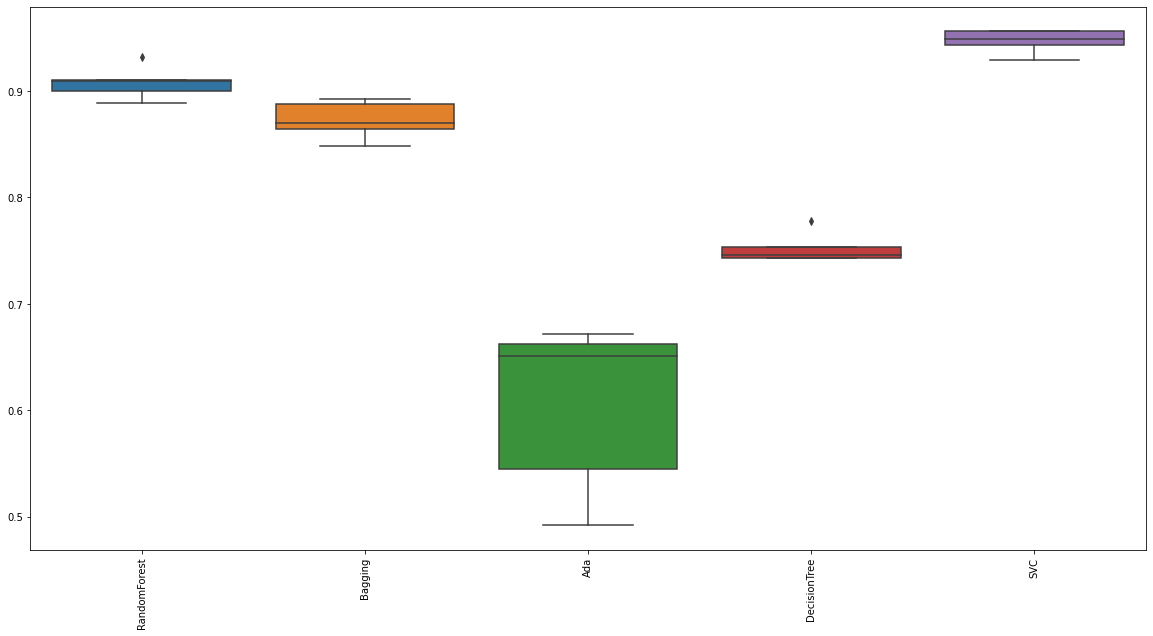

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

labels= results.columns
plt.figure(figsize=(20, 10))

sns.boxplot(data = results).set_xticklabels(labels, rotation=90)

----

# Construir meu ensemble

In [48]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=20)
bg_model = BaggingClassifier(
    max_samples= 0.5, max_features = 1.0, n_estimators = 20)
adb_model = AdaBoostClassifier(
    n_estimators = 5, learning_rate = 1)

In [49]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
  estimators=[
    ('dt_model', dt_model), 
    ('rf_model', rf_model),
    ('bg_model', bg_model),
    ('adb_model', adb_model)             
  ], voting = 'hard')

In [50]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt_model', DecisionTreeClassifier()),
                             ('rf_model',
                              RandomForestClassifier(n_estimators=20)),
                             ('bg_model',
                              BaggingClassifier(max_samples=0.5,
                                                n_estimators=20)),
                             ('adb_model',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=5))])

In [51]:
y_pred = vc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8961904761904762